<h1 align=center><font size = 10> ASM 3 </font></h1>

# Bài toán

Sự phát triển nhanh chóng của việc thu thập dữ liệu đã dẫn đến một kỷ nguyên thông tin mới. Dữ liệu đang được sử dụng nhằm tạo ra các hệ thống giúp con người có thể đạt được nhiều mục tiêu một cách dễ dàng hơn. Trong phim ảnh, một Hệ Thống Đề Xuất ***`(recommender system)`*** có thể giúp con người nhanh chóng tiếp cận những bộ phim mà họ thích, giảm thời gian tìm kiếm và nhanh chóng tiếp cận đến người dùng. Hệ thống Đề xuất là một loại **hệ thống lọc thông tin** cải thiện chất lượng kết quả tìm kiếm và cung cấp các mục phù hợp hơn với mục tìm kiếm hoặc được xác định với lịch sử tìm kiếm của người dùng.


Trong Asm này, chúng ta sẽ xây dựng các loại Hệ Thống Đề Xuất khác nhau cho người dùng. Điều này không chỉ giúp chúng ta có cái nhìn tổng thể với nhiều loại Hệ Thống Đề Xuất khác nhau mà còn giúp chúng ta có thể chọn lựa loại Hệ Thống Đề Xuất phù hợp với bối cảnh.

1. Bắt đầu từ hệ thống đơn giản nhất là dựa vào đánh giá của người dùng đến từng bộ phim***` (demographic filtering)`***, từ đó chúng ta có thể đề xuất những bộ phim nổi trội, đang được người dùng đánh giá tốt và bắt trend.

2. Sau đó là Hệ Thống Đề Xuất phức tạp hơn dựa trên nội dung phim ***`(content-based filtering)`***, giúp chúng ta có thể đề xuất những bộ phim tương quan với bộ phim mà người dùng đang xem hoặc chú ý đến.

3. Cuối cùng chúng ta sẽ được xây dựng một Hệ Thống Đề Xuất dựa vào lịch sử đánh giá của người dùng về các bộ phim thông qua phương pháp Lọc Cộng Tác ***`(collaborative filtering)`***, cụ thể hơn chúng ta sẽ sử dụng một phương pháp khác phục một số nhược điểm của Lọc Cộng Tác là Matrix Factorization. Đồng thời trong phần này, bạn sẽ được tiếp cận một thư viện mới vô cùng hữu ích cho các Hệ Thống Đề Xuất.

# Pipeline

1. Đọc dữ liệu.

2. Xây dựng Hệ Thống Đề Xuất bằng phương pháp Demographic Filtering.

3. Xây dựng Hệ Thống Đề Xuất bằng phương pháp Content Based Filtering.

  - Xây dựng bằng tổng quan của phim.

  - Xây dựng bằng thông tin của phim bao gồm: đạo diễn, diễn viên chính, keywords, thể loại phim.

4. Xây dựng Hệ Thống Đề Xuất bằng phương pháp Collaborative Filtering bằng SVD.

# Tập dữ liệu

**credits** bao gồm các đặc trưng sau:

* **movie_id**: id của phim
* **cast**: tên của các diễn viên chính và phụ.
* **crew**: tên của các nhân viên trong quá trình sản xuất phim (đạo diễn, editor, người soạn nhạc, v.v.)
* **title**: tên của bộ phim

**movies** bao gồm các đặc trưng sau:

* **budget**: kinh phí thực hiện bộ phim.
* **genre**: các thể loại của phim.
* **homepage**: liên kết đến trang chủ của bộ phim.
* **id**: thông tin về movie_id như trong tập dữ liệu tmdb_5000_credits.
* **keywords**: các từ khóa hoặc thẻ liên quan đến bộ phim.
* **original_language**: ngôn ngữ trong bộ phim sử dụng.
* **original_title**: tên phim trước khi dịch hoặc chuyển thể.
* **overview**: mô tả ngắn gọn về bộ phim.
* **popularity**: số lượng chỉ định mức độ phổ biến của bộ phim.
* **production_companies**: nhà sản xuất của bộ phim.
* **production_countries**: quốc gia sản xuất của bộ phim.
* **release_date**: ngày mà nó được phát hành.
* **revenue**: doanh thu trên toàn thế giới do bộ phim tạo ra.
* **runtime**: thời gian  của phim tính bằng phút.
* **status**: Đã phát hành hoặc còn là tin đồn.
* **tagline**: khẩu hiệu của phim.
* **title**: tên phim.
* **vote_average**: đánh giá trung bình mà bộ phim nhận được.
* **vote_count**: số lượng đánh giá.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
credits = pd.read_csv('credits.csv')   
movies = pd.read_csv('movies.csv')

In [3]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
# since there are 2 title columns, we will drop one of them and rename the other 
rec_data = movies.merge(credits, left_on = 'id', right_on = 'movie_id')
rec_data = rec_data.drop(columns=['title_y']).rename(columns={'title_x': 'title'})
rec_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
rec_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [7]:
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    rec_data[feature] = rec_data[feature].apply(literal_eval) 

In [8]:
rec_data

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,9367,"[{'id': 5616, 'name': 'united states–mexico ba...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,"[{'cast_id': 1, 'character': 'El Mariachi', 'c...","[{'credit_id': '52fe44eec3a36847f80b280b', 'de..."
4799,9000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,"[{'cast_id': 1, 'character': 'Buzzy', 'credit_...","[{'credit_id': '52fe487dc3a368484e0fb013', 'de..."
4800,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{'id': 248, 'name': 'date'}, {'i

# **Demographic Filtering**

Với loại đề xuất trong phần này, chúng ta cần

* Một số liệu để chấm điểm hoặc xếp hạng phim
* Tính điểm cho mỗi bộ phim
* Sắp xếp điểm số và giới thiệu bộ phim được đánh giá tốt nhất cho người dùng.

Chúng ta có thể sử dụng đánh giá trung bình làm điểm số nhưng điều này không công bằng. Sự không công bằng này diễn ra khi một bộ phim có đánh giá trung bình là 8.9 nhưng chỉ với 3 lần đánh giá và không được coi là tốt hơn một bộ phim khác có đánh giá trung bình là 7.8 nhưng lại có 40 lần đánh giá.

Do đó chúng ta sẽ sử dụng phương pháp IMDB's weighted rating (wr) cho vấn đề này.

![](https://image.ibb.co/jYWZp9/wr.png)

Trong đó:

* v : số lượng đánh giá cho mỗi bộ phim.
* m : số đánh giá tối thiểu cần thiết để được liệt kê.
* R : đánh giá trung bình của mỗi bộ phim.
* C : giá trị trung bình của các đánh giá trung bình của từng bộ phim.

Chúng ta đã có v(**vote_count**), R(**vote_average**) và C có thể tính được

## Task 2: Xây dựng hàm tính weighted_rating

Tính giá trị C

In [9]:
C = rec_data['vote_average'].mean()
C

6.092171559442016

Tính giá trị m. Sử dụng số lượng vote chiếm 90% của toàn bộ dữ liệu để thiết lập cho m. Điều này có nghĩa là một bộ phim sẽ được đưa vào so sánh nếu số lượng đánh giá ít nhất bằng 90% của toàn bộ dữ liệu.

In [10]:
m = rec_data['vote_count'].quantile(0.9)
m

1838.4000000000015

Xây dựng hàm tính weighted_rating

In [11]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return ((v/(v+m)) * R) + ((m/(v+m)) * C)

## Task 3: Tính điểm cho từng bộ phim từ hàm weighted_ratings và đề xuất phim

Lọc những bộ phim có số lượng đánh giá ít nhất bằng m

In [12]:
filtered_movies = rec_data.copy().loc[rec_data['vote_count'] >= m] 
filtered_movies.shape

(481, 23)

Tính điểm cho từng bộ phim bằng hàm weighted_rating

In [13]:

filtered_movies['score'] = filtered_movies.apply(weighted_rating, axis=1)

# sort top 10 movies 
filtered_movies = filtered_movies.sort_values('score', ascending= False)
filtered_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew,score
1881,25000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,278,"[{'id': 378, 'name': 'prison'}, {'id': 417, 'n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,278,"[{'cast_id': 3, 'character': 'Andy Dufresne', ...","[{'credit_id': '52fe4231c3a36847f800b153', 'de...",8.059258
662,63000000,"[{'id': 18, 'name': 'Drama'}]",http://www.foxmovies.com/movies/fight-club,550,"[{'id': 825, 'name': 'support group'}, {'id': ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,550,"[{'cast_id': 4, 'character': 'The Narrator', '...","[{'credit_id': '55731b8192514111610027d7', 'de...",7.939256
65,185000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",http://thedarkknight.warnerbros.com/dvdsite/,155,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,The Dark Knight,8.2,12002,155,"[{'cast_id': 35, 'character': 'Bruce Wayne', '...","[{'credit_id': '55a0eb4a925141296b0010f8', 'de...",7.920020
3232,8000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",NaN,680,"[{'id': 396, 'name': 'transporter'}, {'id': 14...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,680,"[{'cast_id': 2, 'character': 'Vincent Vega', '...","[{'credit_id': '52fe4269c3a36847f801caa3', 'de...",7.904645
96,160000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",http://inceptionmovie.warnerbros.com/,27205,"[{'id': 1014, 'name': 'loss of lover'}, {'id':...",en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Your mind is the scene of the crime.,Inception,8.1,13752,27205,"[{'cast_id': 1, 'character': 'Dom Cobb', 'cred...","[{'credit_id': '56e8462cc3a368408400354c', 'de...",7.863239


Đề xuất 10 bộ phim dựa vào phương pháp đề xuất Demographic Filtering

In [14]:
filtered_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


## Task 4: Trực quan biểu đồ trực quan 10 bộ phim phổ biến nhất hiện nay bằng chỉ số popularity.

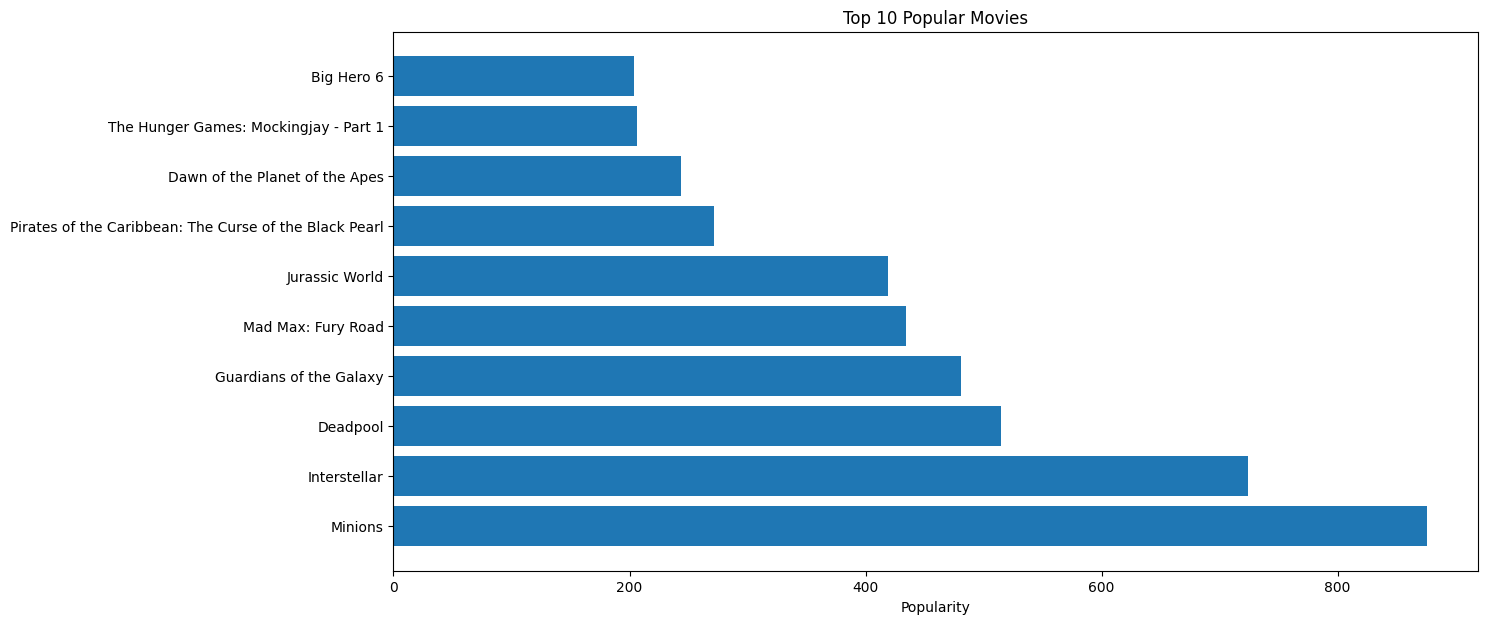

In [15]:
top_10_movies = rec_data.sort_values('popularity', ascending=False).head(10)
plt.figure(figsize=(14,7))
plt.barh(top_10_movies['title'], top_10_movies['popularity'])
plt.xlabel('Popularity')
plt.title('Top 10 Popular Movies')
plt.show()

# **Content Based Filtering**

Trong hệ thống đề xuất này, nội dung của phim (overview, cast, crew, keyword, v.v.) được sử dụng để tìm sự tương đồng của giữa các bộ phim. Sau đó, những bộ phim có nhiều khả năng tương tự nhất được đề xuất.

Chúng ta sẽ tính toán điểm tương đồng theo từng cặp cho tất cả các phim dựa trên mô tả cốt truyện của chúng và đề xuất các phim dựa trên điểm tương đồng đó. Mô tả cốt truyện được đưa ra trong đặc trưng **overview** của tập dữ liệu của chúng tôi.

In [16]:
rec_data['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

Trước hết, vì đặc trưng **overview** là chuỗi, do đó chúng ta không thể làm việc với chúng. Do đó chúng ta sẽ sử dụng một phương pháp là tính toán vector Term Frequency-Inverse Document Frequency (TF-IDF) cho từng **overview**.

Term Frequency(TF) tần xuất xuất hiện của từ trong văn bản. Còn Inverse Document Frequency (IDF) là mức độ quan trọng của từ.

Công thức:

* TF = (số lần từ t xuất hiện trong văn bản d) / (tổng số từ trong văn bản d)
* IDF(t, D) = log(tổng số lượng văn bản trong bộ dữ liệu D/số lượng văn bản trong bộ dữ liệu D có từ t)

Điều này sẽ cung cấp cho bạn một ma trận trong đó mỗi cột đại diện cho một từ trong từ vựng tổng quan (tất cả các từ xuất hiện trong ít nhất một tài liệu) và mỗi hàng đại diện cho một bộ phim hay cụ thể là một overview.

## Task 5: Tính IF-IDF cho toàn bộ overview

Xử lý dữ liệu bị khuyết cho overview. Thay thế Na bằng chuỗi trống: "".

In [17]:
rec_data['overview'] = rec_data['overview'].fillna('')

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(rec_data['overview'])
tfidf_matrix
print(tfidf_matrix.shape)

(4803, 20978)


Với ma trận này, chúng ta đã có thể tính toán giá trị tương tự cho cặp overview.Có nhiều cách để tính giá trị tương tự như euclidean, Pearson and cosine similarity. Trong bài toán này chúng ta sẽ sử dụng similarity để tính giá trị tương tự.

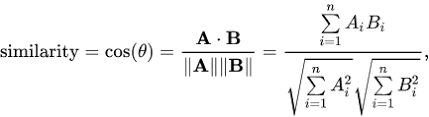

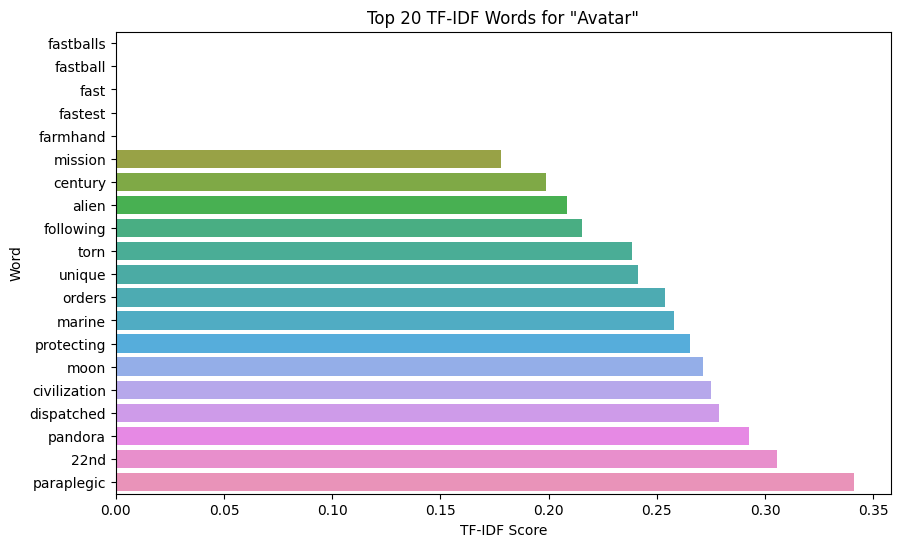

In [19]:
#  visualize top TF-IDF words for a given movie
import numpy as np  
import seaborn as sns 

def plot_top_tfidf_words(tfidf_matrix, feature_names, movie_index, top_n=20):
    row = tfidf_matrix[movie_index].toarray()[0]
    top_indices = np.argsort(row)[-top_n:]
    top_scores = row[top_indices]
    top_words = [feature_names[i] for i in top_indices]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_scores, y=top_words)
    plt.title(f'Top {top_n} TF-IDF Words for "{rec_data.iloc[movie_index]["title"]}"')
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Word')
    plt.show()

# Example usage
plot_top_tfidf_words(tfidf_matrix, tfidf.get_feature_names_out(), movie_index=0)


## Task 6: Tính ma trận tương tự cho overview từ TF-IDF

Ma trận này có kích thước nxn, trong đó n là số lượng overview.

Giá trị cột i dòng j trả về mức độ tương tự của overview thứ i và overview thứ j.


In [20]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(4803, 4803)

## Task 7: Xây dựng hàm để đề xuất phim dựa vào tổng quan của phim

Hàm sẽ được xây dựng bằng các bước nhỏ sau:

* Lấy index của bộ phim thông qua title.

* Lấy danh sách giá trị tương đồng của bộ phim cụ thể theo index so với tất cả các bộ phim. Chuyển nó thành một danh sách các bộ giá trị trong đó phần tử đầu tiên là index và phần tử thứ hai là giá trị tương tự.

* Sắp xếp danh sách trên theo giá trị tương tự giảm dần.

* Lấy ra 10 phần tử đầu từ danh sách trên (10 phần tử này là 10 bộ phim có mức độ tương tự so với phim hiện tại mà ta muốn khuyến nghị). Chú ý là loại bỏ phần tử đầu tiên và bắt đầu lấy từ phẩn tử thứ 2 vì phần tử đầu tiên là chính bộ phim đó. Do là chính bộ phim đó nên giá trị tương tự rất lớn.

* Trả về tiêu đề theo index có trong danh sách 10 bộ phim mà ta muốn khuyến nghị.

Tạo một pandas Series với value là index của dữ liệu bộ phim, index là title của bộ phim.

In [21]:
rec_data = rec_data.reset_index()
pd_ser = pd.Series(rec_data.index, index = rec_data['title']).drop_duplicates()
print(pd_ser.shape)
pd_ser

(4803,)


title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [22]:
print(cosine_sim.shape)

(4803, 4803)


In [23]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = pd_ser[title] # set title into feature set index 
    # extract the similarity set 
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return rec_data['title'].iloc[movie_indices]

print(get_recommendations('The Dark Knight Rises'))

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object


Bạn có thể thấy hầy hết các phim được trả về là phim của DC, tương tự như bộ phim mà người dùng đang xem.

Thực hiện lại điều này với một bộ phim của Marvel như 'The Avengers'

In [24]:
print(get_recommendations('The Avengers'))

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object


Tiếp theo, chúng ta sẽ xây dựng một hệ thống đề xuất khác, ngoài việc chỉ sử dụng overview, chúng ta sẽ sử dụng các dữ liệu khác như 3 diễn viên hàng đầu (actor), đạo diễn, thể loại và keywords

Dữ liệu cột crew cho chúng ta biết được các nhân viên đã tham gia trong quá trình sản xuất phim. Do đó để có được dữ liệu về đạo diễn, bạn cần tách đạo diễn từ crew sang một cột director.

## Task 8: Lấy ra tên tác giả từ cột crew và lưu vào cột director

In [25]:
def extract_director(x):
    for crew_member in x:
        if crew_member['job'] == 'Director' : 
            return crew_member['name']

        return np.nan
    
rec_data['director'] = rec_data['crew'].apply(extract_director)
print(rec_data['director'].value_counts().unique())

[19 13  8  7  6  5  4  3  2  1]


## Task 9: Lấy ra 3 diễn viên đầu tiên từ cột cast và lưu vào chính cột cast. Làm điều tương tự với keywords và genres

In [26]:
# function for getting the top actorr/actress 
def get_top_cast(x):
    if isinstance(x,list): 
        top_3 = [i['name'] for i in x[:3]]
        return top_3
    return []

rec_data['cast'] = rec_data['cast'].apply(get_top_cast)

# similar preprocessing to other feature
def get_top_keywords(x):
    if isinstance(x,list): 
        top_3 = [i['name'] for i in x[:3]]
        return top_3
    return []
rec_data['keywords'] = rec_data['keywords'].apply(get_top_keywords)

def get_top_genres(x):
    if isinstance(x,list): 
        top_3 = [i['name'] for i in x[:3]]
        return top_3
    return []
rec_data['genres'] = rec_data['genres'].apply(get_top_genres)


In [27]:
# check 
rec_data[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",NaN,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",NaN,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",NaN,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


## Task 10: Điều chỉnh dữ liệu phù hợp với đầu vào của thuật toán

Chuyển đổi tên và các trường hợp từ khóa thành chữ thường và loại bỏ tất cả các khoảng cách giữa chúng. Điều này được thực hiện để không tính từ Johnny của "Johnny Depp" và "Johnny Galecki" là giống nhau.

In [28]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    elif isinstance(x, str):
        return str.lower(x.replace(" ", ""))
    else:
        return ''

for feature in ['cast', 'director', 'keywords', 'genres']:
    rec_data[feature] = rec_data[feature].apply(clean_data)
rec_data.head(5)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew,director
0,0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",
1,1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",
2,2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",
3,3,250000000,"[action, crime, drama]",http://www.thedarkknightrises.com/,49026,"[dccomics, crimefighter, terrorist]",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[christianbale, michaelcaine, garyoldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",
4,4,260000000,"[action, adventure, sciencefiction]",http://movies.disney.com/john-carter,49529,"[basedonnovel, mars, medallion]",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[taylorkitsch, lynncollins, samanthamorton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",


In [29]:
# check the datatype of columns 
rec_data['director'] = rec_data['director'].apply(lambda x:[x] if isinstance(x,str) else x)

In [30]:
rec_data['movie_info'] = rec_data['keywords'] + rec_data['cast'] + rec_data['director'] + rec_data['genres']
rec_data['movie_info'] = rec_data['movie_info'].apply(lambda x: ' '.join(x))

print(rec_data['movie_info'].head())

0    cultureclash future spacewar samworthington zo...
1    ocean drugabuse exoticisland johnnydepp orland...
2    spy basedonnovel secretagent danielcraig chris...
3    dccomics crimefighter terrorist christianbale ...
4    basedonnovel mars medallion taylorkitsch lynnc...
Name: movie_info, dtype: object


## Task 12: Tính CountVectorizer cho từng movie_info

Thay vì tính IF-IDF, lần này chúng ta sẽ tính CountVectorizer cho từng bộ phim bởi vì chúng ta chỉ cần kiểm tra xem một từ có xuất hiện trong đoạn văn hay không. Điều này giống như kiểm tra xem đạo diễn hoặc diễn viên có xuất hiện trong movie_info hay không.

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count_v = CountVectorizer(stop_words='english')
count_matrix = count_v.fit_transform(rec_data['movie_info']) 

# calculate cosine similarity for count matrix 
cosine_sim2 = cosine_similarity(count_matrix,count_matrix)

In [32]:
print(get_recommendations('The Dark Knight Rises', cosine_sim2))

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
3073           Romeo Is Bleeding
1986                      Faster
1503                      Takers
3326              Black November
303                     Catwoman
747               Gangster Squad
1149             American Hustle
Name: title, dtype: object


In [33]:
print(get_recommendations('The Godfather', cosine_sim2))

867      The Godfather: Part III
2649           The Son of No One
4638    Amidst the Devil's Wings
1170     The Talented Mr. Ripley
1394               Donnie Brasco
1850                    Scarface
2280                 Sea of Love
2731      The Godfather: Part II
2792         Glengarry Glen Ross
4124          This Thing of Ours
Name: title, dtype: object


## Task 13: Tính ma trận tương tự cho movie_info từ CountVectorizer

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

def get_recommendations(title, cosine_sim=cosine_sim2):
    indices = pd.Series(rec_data.index, index=rec_data['title']).drop_duplicates()
    
    if title not in indices.index:
        return "Movie not found in the index."
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return rec_data['title'].iloc[movie_indices]

# Test the function
print(get_recommendations('The Dark Knight Rises', cosine_sim2))

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
3073           Romeo Is Bleeding
1986                      Faster
1503                      Takers
3326              Black November
303                     Catwoman
747               Gangster Squad
1149             American Hustle
Name: title, dtype: object


In [35]:
print(get_recommendations('The Godfather',cosine_sim2))


867      The Godfather: Part III
2649           The Son of No One
4638    Amidst the Devil's Wings
1170     The Talented Mr. Ripley
1394               Donnie Brasco
1850                    Scarface
2280                 Sea of Love
2731      The Godfather: Part II
2792         Glengarry Glen Ross
4124          This Thing of Ours
Name: title, dtype: object


# **Collaborative Filtering**

## Single Value Decomposition

***`Nhược điểm của Lọc Cộng tác về khả năng mở rộng (scalability) và độ thưa thớt (sparsity)`***. Để xử lý vấn đề này chúng ta có thể sử dụng latent factor model (mô hình yếu tố tiềm ẩn) để nắm bắt sử giống nhau của người dùng và mặt hàng.

Về cơ bản, chúng ta muốn biến vấn đề đề xuất thành vấn đề tối ưu hóa. ***`Chúng ta có thể xem đó là mức độ tốt của chúng ta trong việc dự đoán xếp hạng cho các mặt hàng do người dùng cung cấp. Với chi phí càng nhỏ thì dự đoán càng tốt.`***

Một latent factor model mà chúng ta có thể sử dụng là [Single Value Decomposition](https://machinelearningcoban.com/2017/06/07/svd/) mà chúng ta đã tìm hiểu từ [Matrix Factorization](https://machinelearningcoban.com/2017/05/31/matrixfactorization/)

### Task 14: Đọc dữ liệu đánh giá phim của người dùng.

In [36]:
ratings = pd.read_csv('credits.csv')
ratings.head(10) 

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
5,559,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."
6,38757,Tangled,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de..."
7,99861,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de..."
8,767,Harry Potter and the Half-Blood Prince,"[{""cast_id"": 3, ""character"": ""Harry Potter"", ""...","[{""credit_id"": ""52fe4273c3a36847f801fab1"", ""de..."
9,209112,Batman v Superman: Dawn of Justice,"[{""cast_id"": 18, ""character"": ""Bruce Wayne / B...","[{""credit_id"": ""553bf23692514135c8002886"", ""de..."


In [38]:
%pip install scikit-surprise

  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build scikit-surprise
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for scikit-surprise (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [123 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-310
      creating build\lib.win-amd64-cpython-310\surprise
      copying surprise\accuracy.py -> build\lib.win-amd64-cpython-310\surprise
      copying surprise\builtin_datasets.py -> build\lib.win-amd64-cpython-310\surprise
      copying surprise\dataset.py -> build\lib.win-amd64-cpython-310\surprise
      copying surprise\dump.py -> build\lib.win-amd64-cpython-310\surprise
      copying surprise\reader.py -> build\lib.win-amd64-cpython-310\surprise
      copying surprise\trainset.py -> build\lib.win-amd64-cpython-310\surprise
      copying surprise\utils.py -> build\lib.win-amd64-cpython-310\surprise
      copying surprise\__init__.py -> build\lib.win-amd64-cpython-310\surprise
      cop

In [37]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate, KFold
from surprise import accuracy

# Define reader
reader = Reader()

# Load the dataset into Surprise
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Define the SVD model
svd = SVD()

# Perform cross-validation
kf = KFold(n_splits=5)
for trainset, testset in kf.split(data):
    svd.fit(trainset)
    predictions = svd.test(testset)
    accuracy.rmse(predictions, verbose=True)

# Predict for a specific user and item
svd.predict(1, 302)


ModuleNotFoundError: No module named 'surprise'